<a href="https://colab.research.google.com/github/ofchwan/Deep_Learning/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 창시자에게 배우는 딥러닝
## 4. 신경망 시작하기: 분류와 회귀

### 4.1 영화 리뷰 분류 : 이진 분류 문제

In [1]:
# 데이터 load

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 1s 0us/step


* data에 포함된 리뷰는 단어의 인덱스(단어 시퀀스가 인코딩된 것)의 리스트로 구성되어 있음
* label은 부정(negativa, 0), 긍정(positive, 1)로 구성

In [2]:
# 인덱스 -> word (decoding)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

* 신경망을 학습시키기 위해서는 동일한 크기의 배치, 즉 텐서가 필요함
* 리스트를 텐서로 바꾸는 방법은 두 가지
  1. 리스트에 패딩을 추가하고 (samples, max_length) 크기의 정수 텐서로 변환
  2. 리스트를 원-핫 인코딩하여 0 또는 1의 벡터로 변환

In [3]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
# 멀티-핫 인코딩


import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    # print(i, sequence)
    for j in sequence:
      results[i, j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [6]:
# label의 경우에는 쉽게 벡터로 바꿀 수 있음
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 4.13 신경망 모델 만들기

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [10]:
# validation dataset

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 73ms/step - loss: 0.5260 - accuracy: 0.7773 - val_loss: 0.4235 - val_accuracy: 0.8316
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3283 - accuracy: 0.8918 - val_loss: 0.3166 - val_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2443 - accuracy: 0.9195 - val_loss: 0.2958 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1982 - accuracy: 0.9351 - val_loss: 0.2897 - val_accuracy: 0.8833
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1650 - accuracy: 0.9467 - val_loss: 0.2891 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1430 - accuracy: 0.9542 - val_loss: 0.2811 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1213 - accuracy: 0.9630 - val_loss: 0.2913 - val_accuracy: 0.8875
Epoch 8/20
30

* model.fit() 메소드는 history 객체를 반환
* history 객체에는 훈련하는 동안의 모든 정보를 담고 있음

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

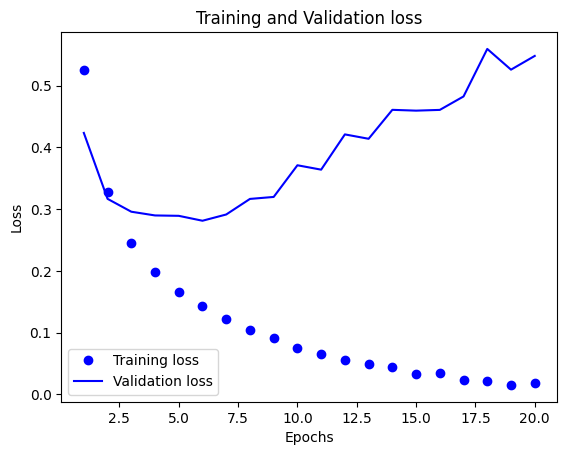

In [13]:
# train, val loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo는 파란색 점
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # bo는 파란색 실선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

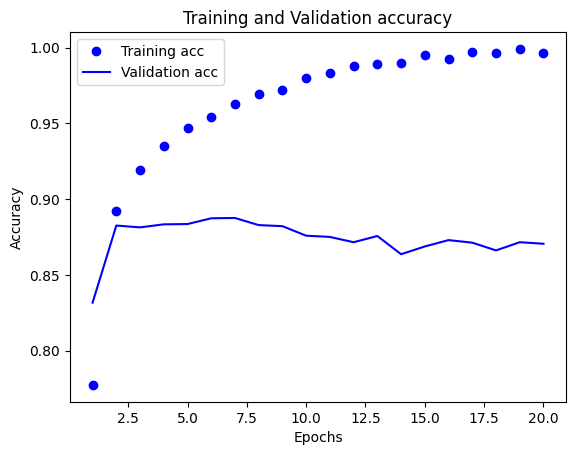

In [14]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

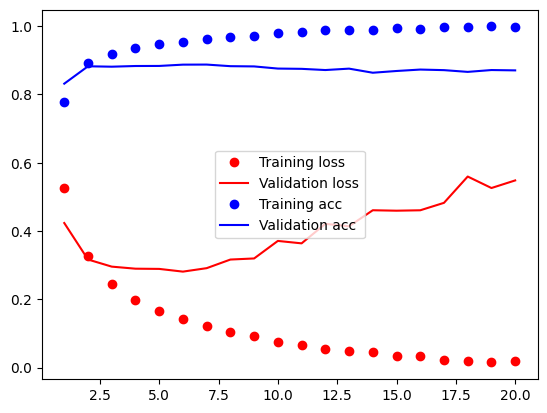

In [15]:
# 합쳐서 그려보자.

plt.clf()
plt.plot(epochs, loss_values, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.legend()
plt.show()

* 4 epochs 부터는 overfitting 현상이 발생(val_loss 증가, val_acc 감소)

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [17]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [18]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4779 - accuracy: 0.8128
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2820 - accuracy: 0.9008
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2183 - accuracy: 0.9210
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1851 - accuracy: 0.9322


In [19]:
results = model.evaluate(x_test, y_test)
print('loss : ', results[0], '/ accuracy : ', results[1])

782/782 [==============================] - 2s 3ms/step - loss: 0.2838 - accuracy: 0.8873
loss :  0.28384238481521606 / accuracy :  0.8873199820518494


### 4.2 뉴스 기사 분류: 다중 분류 문제
* dataset : 로이터

In [20]:
# data load
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 1s 0us/step


In [21]:
len(train_data), len(test_data)

(8982, 2246)

In [22]:
# 각 sample은 단어 인덱스
train_data[2]

[1,
 53,
 12,
 284,
 15,
 14,
 272,
 26,
 53,
 959,
 32,
 818,
 15,
 14,
 272,
 26,
 39,
 684,
 70,
 11,
 14,
 12,
 3886,
 18,
 180,
 183,
 187,
 70,
 11,
 14,
 102,
 32,
 11,
 29,
 53,
 44,
 704,
 15,
 14,
 19,
 758,
 15,
 53,
 959,
 47,
 1013,
 15,
 14,
 19,
 132,
 15,
 39,
 965,
 32,
 11,
 14,
 147,
 72,
 11,
 180,
 183,
 187,
 44,
 11,
 14,
 102,
 19,
 11,
 123,
 186,
 90,
 67,
 960,
 4,
 78,
 13,
 68,
 467,
 511,
 110,
 59,
 89,
 90,
 67,
 1390,
 55,
 2678,
 92,
 617,
 80,
 1274,
 46,
 905,
 220,
 13,
 4,
 346,
 48,
 235,
 629,
 5,
 211,
 5,
 1118,
 7,
 2,
 81,
 5,
 187,
 11,
 15,
 9,
 1709,
 201,
 5,
 47,
 3615,
 18,
 478,
 4514,
 5,
 1118,
 7,
 232,
 2,
 71,
 5,
 160,
 63,
 11,
 9,
 2,
 81,
 5,
 102,
 59,
 11,
 17,
 12]

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_newswire)
print(train_labels[0])

550378/550378 [==============================] - 0s 1us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
3


In [24]:
# 역시 단어 인덱스를 벡터로 변환(멀티-핫 인코딩)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
# 레이블을 벡터로 변환하기(원-핫 인코딩)
# keras 내장 함수
"""from keras.utils.up_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)"""

def to_one_hot(labels, dimension = 46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

### 4.2.3 모델 구성하기

In [26]:
# 출력 노드가 46개이기 때문에 hidden layer의 노드 수를 늘려야함

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

In [27]:
# loss function = categorical crossentropy

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
# validation datset

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [29]:
# epochs = 20

history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 36ms/step - loss: 2.8699 - accuracy: 0.5008 - val_loss: 1.9229 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.6047 - accuracy: 0.6798 - val_loss: 1.4030 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2088 - accuracy: 0.7479 - val_loss: 1.2453 - val_accuracy: 0.7230
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9946 - accuracy: 0.7865 - val_loss: 1.1078 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8319 - accuracy: 0.8205 - val_loss: 1.0552 - val_accuracy: 0.7700
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7043 - accuracy: 0.8444 - val_loss: 0.9669 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5903 - accuracy: 0.8721 - val_loss: 0.9556 - val_accuracy: 0.8040
Epoch 8/20
16

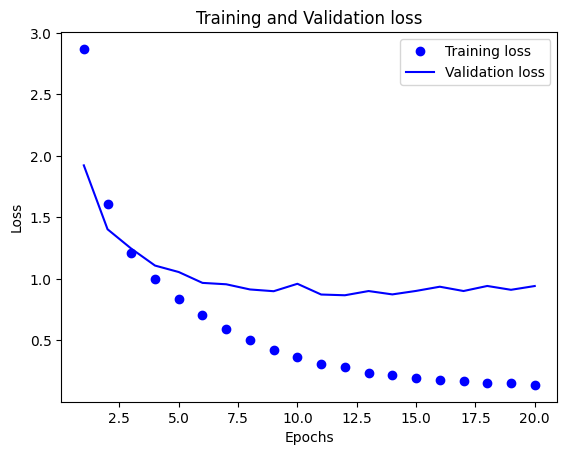

In [30]:
# train, val loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training loss') # bo는 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # bo는 파란색 실선
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

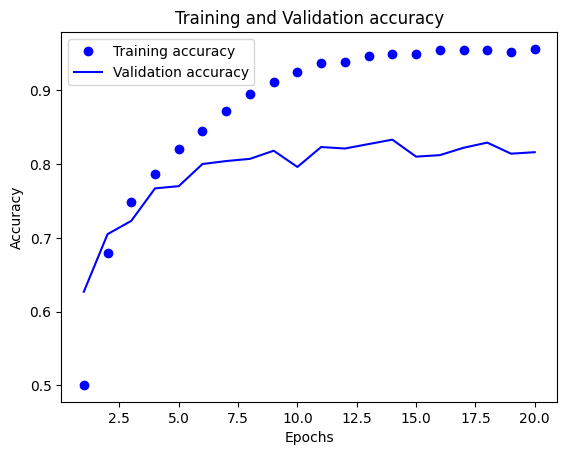

In [31]:
plt.clf() # 그래프 초기화

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training accuracy') # bo는 파란색 점
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy') # bo는 파란색 실선
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs = 20,
          batch_size = 512)

results = model.evaluate(x_test, y_test)
print('loss : ', results[0], '/ accuracy : ', results[1])

Epoch 1/20
16/16 [==============================] - 1s 13ms/step - loss: 2.5719 - accuracy: 0.4996
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5032 - accuracy: 0.6693
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1698 - accuracy: 0.7425
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9561 - accuracy: 0.7907
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.7904 - accuracy: 0.8309
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6562 - accuracy: 0.8597
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5481 - accuracy: 0.8832
Epoch 8/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4554 - accuracy: 0.9013
Epoch 9/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3840 - accuracy: 0.9209
Epoch 10/20
16/16 [==============================] - 0s 13ms/step - loss: 0.3254 - accuracy: 0.9295
Epoch 11/

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs = 13,
          batch_size = 512)

results = model.evaluate(x_test, y_test)
print('loss : ', results[0], '/ accuracy : ', results[1])

Epoch 1/13
16/16 [==============================] - 1s 13ms/step - loss: 2.7071 - accuracy: 0.5066
Epoch 2/13
16/16 [==============================] - 0s 14ms/step - loss: 1.5013 - accuracy: 0.6933
Epoch 3/13
16/16 [==============================] - 0s 14ms/step - loss: 1.1484 - accuracy: 0.7565
Epoch 4/13
16/16 [==============================] - 0s 13ms/step - loss: 0.9457 - accuracy: 0.7938
Epoch 5/13
16/16 [==============================] - 0s 14ms/step - loss: 0.7966 - accuracy: 0.8237
Epoch 6/13
16/16 [==============================] - 0s 14ms/step - loss: 0.6655 - accuracy: 0.8534
Epoch 7/13
16/16 [==============================] - 0s 13ms/step - loss: 0.5610 - accuracy: 0.8820
Epoch 8/13
16/16 [==============================] - 0s 13ms/step - loss: 0.4764 - accuracy: 0.8984
Epoch 9/13
16/16 [==============================] - 0s 14ms/step - loss: 0.4008 - accuracy: 0.9156
Epoch 10/13
16/16 [==============================] - 0s 14ms/step - loss: 0.3434 - accuracy: 0.9285
Epoch 11/

In [34]:
# 만약 hidden layer의 node 수를 줄인다면?

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs = 13,
          batch_size = 512)

results = model.evaluate(x_test, y_test)
print('loss : ', results[0], '/ accuracy : ', results[1])

Epoch 1/13
16/16 [==============================] - 1s 18ms/step - loss: 3.5707 - accuracy: 0.0170
Epoch 2/13
16/16 [==============================] - 0s 19ms/step - loss: 3.1436 - accuracy: 0.1874
Epoch 3/13
16/16 [==============================] - 0s 16ms/step - loss: 2.7953 - accuracy: 0.2454
Epoch 4/13
16/16 [==============================] - 0s 15ms/step - loss: 2.5091 - accuracy: 0.2681
Epoch 5/13
16/16 [==============================] - 0s 13ms/step - loss: 2.2585 - accuracy: 0.3185
Epoch 6/13
16/16 [==============================] - 0s 14ms/step - loss: 2.0108 - accuracy: 0.3497
Epoch 7/13
16/16 [==============================] - 0s 14ms/step - loss: 1.7708 - accuracy: 0.3673
Epoch 8/13
16/16 [==============================] - 0s 13ms/step - loss: 1.5514 - accuracy: 0.6436
Epoch 9/13
16/16 [==============================] - 0s 13ms/step - loss: 1.3759 - accuracy: 0.6988
Epoch 10/13
16/16 [==============================] - 0s 14ms/step - loss: 1.2468 - accuracy: 0.7081
Epoch 11/

In [35]:
# 만약 hidden layer의 node 수를 늘린다면?


model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs = 13,
          batch_size = 512)

results = model.evaluate(x_test, y_test)
print('loss : ', results[0], '/ accuracy : ', results[1])

Epoch 1/13
16/16 [==============================] - 1s 13ms/step - loss: 2.7282 - accuracy: 0.4838
Epoch 2/13
16/16 [==============================] - 0s 14ms/step - loss: 1.5145 - accuracy: 0.6865
Epoch 3/13
16/16 [==============================] - 0s 14ms/step - loss: 1.1625 - accuracy: 0.7414
Epoch 4/13
16/16 [==============================] - 0s 14ms/step - loss: 0.9501 - accuracy: 0.7912
Epoch 5/13
16/16 [==============================] - 0s 14ms/step - loss: 0.7826 - accuracy: 0.8294
Epoch 6/13
16/16 [==============================] - 0s 14ms/step - loss: 0.6541 - accuracy: 0.8576
Epoch 7/13
16/16 [==============================] - 0s 15ms/step - loss: 0.5392 - accuracy: 0.8849
Epoch 8/13
16/16 [==============================] - 0s 15ms/step - loss: 0.4513 - accuracy: 0.9043
Epoch 9/13
16/16 [==============================] - 0s 17ms/step - loss: 0.3742 - accuracy: 0.9201
Epoch 10/13
16/16 [==============================] - 0s 21ms/step - loss: 0.3202 - accuracy: 0.9312
Epoch 11/

In [36]:
# hidden layer의 개수를 늘린다면?

model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train,
          epochs = 13,
          batch_size = 512)

results = model.evaluate(x_test, y_test)
print('loss : ', results[0], '/ accuracy : ', results[1])

Epoch 1/13
16/16 [==============================] - 1s 15ms/step - loss: 2.6156 - accuracy: 0.4803
Epoch 2/13
16/16 [==============================] - 0s 13ms/step - loss: 1.5070 - accuracy: 0.6679
Epoch 3/13
16/16 [==============================] - 0s 13ms/step - loss: 1.2004 - accuracy: 0.7250
Epoch 4/13
16/16 [==============================] - 0s 14ms/step - loss: 0.9927 - accuracy: 0.7701
Epoch 5/13
16/16 [==============================] - 0s 14ms/step - loss: 0.8316 - accuracy: 0.8103
Epoch 6/13
16/16 [==============================] - 0s 14ms/step - loss: 0.6853 - accuracy: 0.8420
Epoch 7/13
16/16 [==============================] - 0s 14ms/step - loss: 0.5830 - accuracy: 0.8667
Epoch 8/13
16/16 [==============================] - 0s 14ms/step - loss: 0.4745 - accuracy: 0.8915
Epoch 9/13
16/16 [==============================] - 0s 14ms/step - loss: 0.4028 - accuracy: 0.9078
Epoch 10/13
16/16 [==============================] - 0s 13ms/step - loss: 0.3345 - accuracy: 0.9273
Epoch 11/

### 4.3 주택 가격 예측: 회귀 문제
* dataset : 보스턴 주택 가격

In [37]:
# dataset load

from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [38]:
print(train_data.shape, test_data.shape)

(404, 13) (102, 13)


In [39]:
# feature 별로 정규화(평균이 0이고 표준편차가 1이 될 수 있도록)

mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean # test data에 대해서 정규화할 때 train data에서 계산한 값으로 정규화하는 것이 중요, training 과정에서 절대 test data의 값을 사용하면 안되기 때문
test_data /= std

In [40]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation = 'relu'),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = 'mae')
  return model

In [41]:
# sample 수가 적기 때문에 val_data에 대한 분산이 높은 상황 --> k-fold cross validation 기법을 통해서 다양한 val_data 사용

k = 4 # k : fold
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f'#{i}번째 fold 처리 중')
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis = 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis = 0
  )

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs = num_epochs, batch_size = 16, verbose = 0) # verbose = 0 : 훈련 과정 출력 x
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

#0번째 fold 처리 중
#1번째 fold 처리 중
#2번째 fold 처리 중
#3번째 fold 처리 중


In [42]:
print(all_scores, np.mean(all_scores))

[1.9899849891662598, 2.3322672843933105, 2.4531233310699463, 2.4248507022857666] 2.300056576728821


In [43]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f'#{i}번째 fold 처리 중')
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis = 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis = 0
  )

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
                      epochs = num_epochs, batch_size = 16, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

#0번째 fold 처리 중
#1번째 fold 처리 중
#2번째 fold 처리 중
#3번째 fold 처리 중


In [44]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

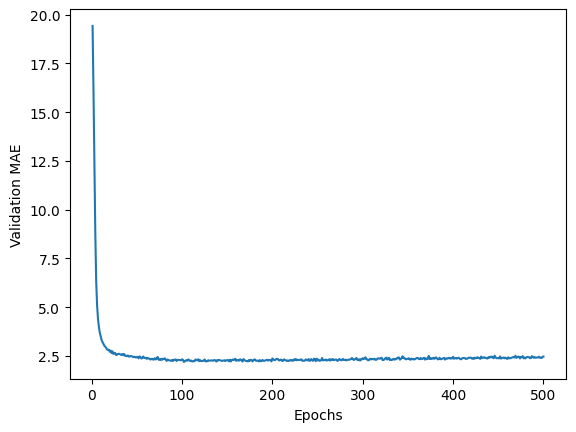

In [45]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

* 초반 epoch에 대해서 MAE 값이 크다보니 범위가 넓어짐 --> 초반 epoch를 일부 제외하고 다시 plotting

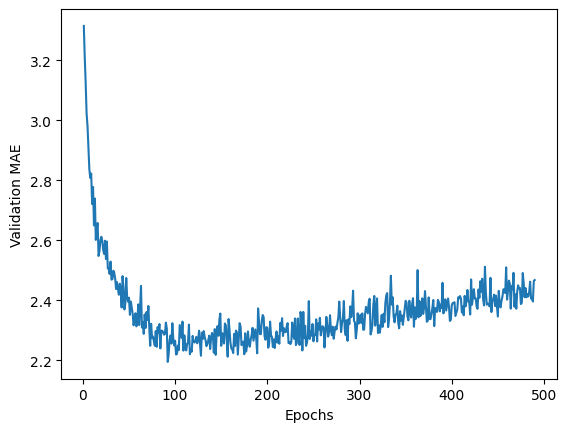

In [46]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

* 130 epoch 이후부터 overfitting

In [47]:
model = build_model()
model.fit(train_data, train_targets, epochs = 130, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 14.2933 - mae: 2.4584
2.4584004878997803
